### Discovering CNNs' Basic Operations

In [2]:
%matplotlib inline
import tensorflow as tf
import matplotlib
from matplotlib import pyplot as plt
from skimage import io

### 1. Setup

In [13]:
image = io.imread("./bird_pic_by_benjamin_planche.png")

In [14]:
image

array([[192, 192, 192, ..., 200, 200, 200],
       [190, 190, 190, ..., 200, 200, 200],
       [189, 189, 189, ..., 200, 200, 200],
       ...,
       [ 47,  43,  43, ..., 184, 184, 184],
       [ 29,  31,  53, ..., 184, 184, 183],
       [ 19,  20,  50, ..., 185, 185, 184]], dtype=uint8)

Image shape : (680, 608)


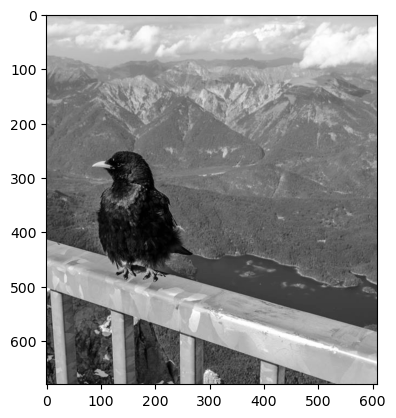

In [15]:
print("Image shape : {}".format(image.shape))
plt.imshow(image, cmap=plt.cm.gray)

텐서로 변환

In [18]:
image = tf.convert_to_tensor(image, tf.float32, name="input_image")
print(image.shape)

(680, 608)


대부분의 텐서플로 연산은 배치 이미지, 즉 모양에 대한 것이므로 이미지의 차원을 합성적으로 확장하여 단일 이미지의 배치로 변환한다.

In [19]:
image = tf.expand_dims(image, axis=0)
print(image.shape)

(1, 680, 608)


마찬가지로, 우리의 이미지는 그레이스케일이고 하나의 채널만 있기 때문에, 현재 그것은 명시적으로 4번째 깊이 치수를 가지고 있지 않다. 우리는 텐서를 다시 확장함으로써 그것을 수정한다.

In [20]:
image = tf.expand_dims(image, axis=-1)
print("Tensor shape : {}".format(image.shape))

Tensor shape : (1, 680, 608, 1)


#### 2. Convolution

we define a  filter (or kernel) commonly used to blur images (Gaussian blur):

In [33]:
kernel = tf.constant([[1/16, 2/16, 1/16],
                      [2/16, 4/16, 2/16],
                      [1/16, 2/16, 1/16]], tf.float32, name="gaussian_kernel")

그러나 컨볼루션 방법에서는 필터 텐서가 (k,  k, D, N) 모양이어야 한다(정사각형 필터 크기와 필터 수).

In [34]:
kernel = tf.expand_dims(tf.expand_dims(kernel, axis=-1), axis=-1)

In [35]:
blurred_image = tf.nn.conv2d(image, kernel, strides=[1, 1, 1, 1], padding="SAME")

In [36]:
blurred_image

<tf.Tensor: shape=(1, 680, 608, 1), dtype=float32, numpy=
array([[[[107.625 ],
         [143.5   ],
         [143.5   ],
         ...,
         [150.    ],
         [150.    ],
         [112.5   ]],

        [[142.6875],
         [190.25  ],
         [190.25  ],
         ...,
         [200.    ],
         [200.    ],
         [150.    ]],

        [[142.125 ],
         [189.5   ],
         [189.5   ],
         ...,
         [200.    ],
         [200.    ],
         [150.    ]],

        ...,

        [[ 32.    ],
         [ 41.25  ],
         [ 43.625 ],
         ...,
         [183.9375],
         [184.1875],
         [138.0625]],

        [[ 23.3125],
         [ 35.8125],
         [ 50.6875],
         ...,
         [183.8125],
         [184.0625],
         [137.8125]],

        [[ 12.8125],
         [ 22.625 ],
         [ 38.5   ],
         ...,
         [138.125 ],
         [138.3125],
         [103.5   ]]]], dtype=float32)>

In [37]:
blurred_res = blurred_image.numpy()

In [38]:
blurred_res

array([[[[107.625 ],
         [143.5   ],
         [143.5   ],
         ...,
         [150.    ],
         [150.    ],
         [112.5   ]],

        [[142.6875],
         [190.25  ],
         [190.25  ],
         ...,
         [200.    ],
         [200.    ],
         [150.    ]],

        [[142.125 ],
         [189.5   ],
         [189.5   ],
         ...,
         [200.    ],
         [200.    ],
         [150.    ]],

        ...,

        [[ 32.    ],
         [ 41.25  ],
         [ 43.625 ],
         ...,
         [183.9375],
         [184.1875],
         [138.0625]],

        [[ 23.3125],
         [ 35.8125],
         [ 50.6875],
         ...,
         [183.8125],
         [184.0625],
         [137.8125]],

        [[ 12.8125],
         [ 22.625 ],
         [ 38.5   ],
         ...,
         [138.125 ],
         [138.3125],
         [103.5   ]]]], dtype=float32)

In [39]:
blurred_res = blurred_res[0, ..., 0]
print(blurred_res)

[[107.625  143.5    143.5    ... 150.     150.     112.5   ]
 [142.6875 190.25   190.25   ... 200.     200.     150.    ]
 [142.125  189.5    189.5    ... 200.     200.     150.    ]
 ...
 [ 32.      41.25    43.625  ... 183.9375 184.1875 138.0625]
 [ 23.3125  35.8125  50.6875 ... 183.8125 184.0625 137.8125]
 [ 12.8125  22.625   38.5    ... 138.125  138.3125 103.5   ]]


In [40]:
blurred_res.shape

(680, 608)

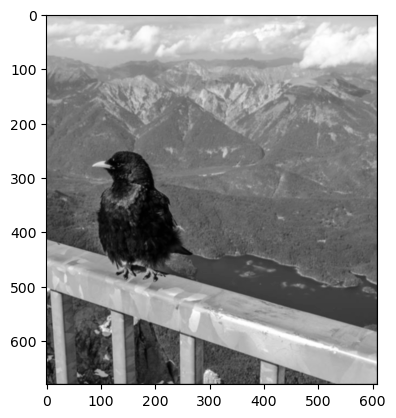

In [41]:
plt.imshow(blurred_res, cmap=plt.cm.gray)

- 새의 깃털이나 경관의 세부 사항을 관찰하면 이미지가 얼마나 흐릿해졌는지 알 수 있다.
- 이제 윤곽 검출을 위한 커널이 사용된다.

In [42]:
kernel = tf.constant([[-1, -1, -1],
                      [-1, 8, -1],
                      [-1, -1, -1]], tf.float32, name="edge_kernel")
kernel = tf.expand_dims(tf.expand_dims(kernel, axis=-1), axis=-1)

- 이것이 결과 텐서에 어떤 영향을 미치는지 보여주기 위해 더 큰 보폭을 사용한다.

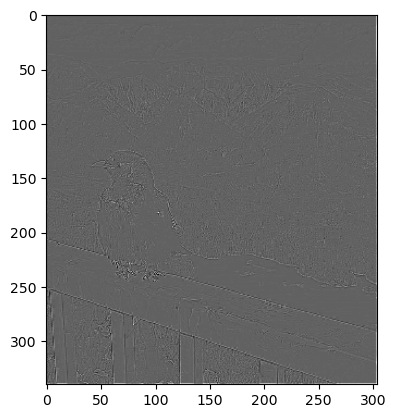

In [45]:
edge_image = tf.nn.conv2d(image, kernel, strides=[1, 2, 2, 1], padding="SAME")
edge_res = edge_image.numpy()[0, ..., 0]
plt.imshow(edge_res, cmap=plt.cm.gray)

- 자세히 보면 이미지의 테두리가 흰색이다.
- 이는 커널에 의해 윤곽선으로 감지되는 제로 패딩(패딩 "SAME"를 선택한 이후)에 의해 발생한다. 
- 실제로 이미지를 패딩하지 않으면 사라집니다.

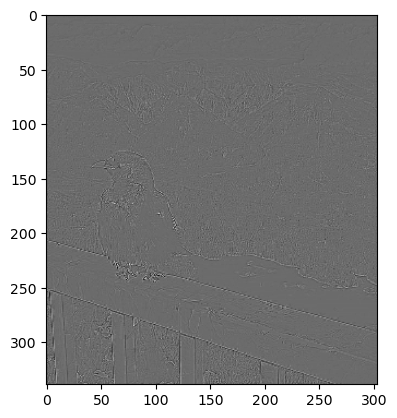

In [46]:
edge_image = tf.nn.conv2d(image, kernel, strides=[1, 2, 2, 1], padding="VALID")
edge_res = edge_image.numpy()[0, ..., 0]
plt.imshow(edge_res, cmap=plt.cm.gray)

#### 3. Pooling
- 최대 풀링과 평균 풀링의 경우 각 window의 값이 단일 출력으로 집계되어 각각 최대 또는 평균 연산을 적용합니다. 

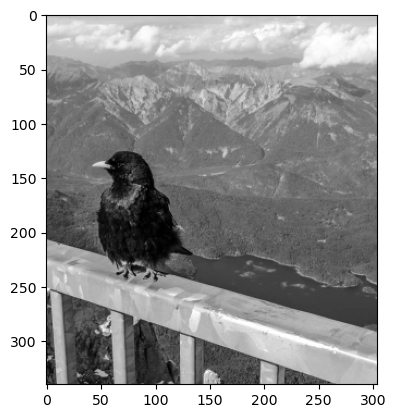

In [48]:
avg_pooled_image = tf.nn.avg_pool(image, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME")
avg_res = avg_pooled_image.numpy()[0, ..., 0]
plt.imshow(avg_res, cmap=plt.cm.gray)

max-pooling

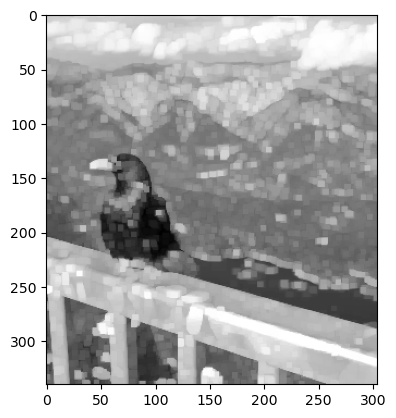

In [49]:
max_pooled_image = tf.nn.max_pool(image, ksize=[1, 10, 10, 1], strides=[1, 2, 2, 1], padding="SAME")
max_res = max_pooled_image.numpy()[0, ..., 0]
plt.imshow(max_res, cmap=plt.cm.gray)